In [1]:
import pandas as pd
import numpy as np

In [2]:
#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [177]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import plot_importance, XGBClassifier 

# 1. 데이터 불러오기

In [266]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [120]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [121]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# 결측갑 확인

In [6]:
train_df.info()  #age, cabin , Embarked에 결측값 존재

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test_df.info()  #age, fare , cabin에 결측값 존재

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# 2. EDA

In [8]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [9]:
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [10]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## 시각화

In [ ]:
#나이, 생존률

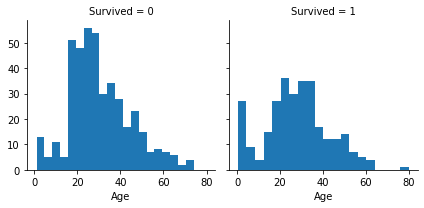

In [14]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [ ]:
#요금, 생존률

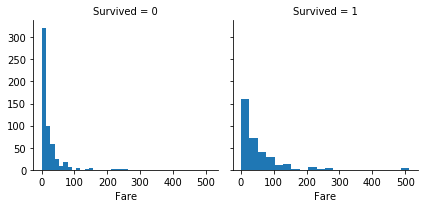

In [16]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Fare', bins=20)

In [ ]:
#성별, 나이 

C:\Users\82104\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


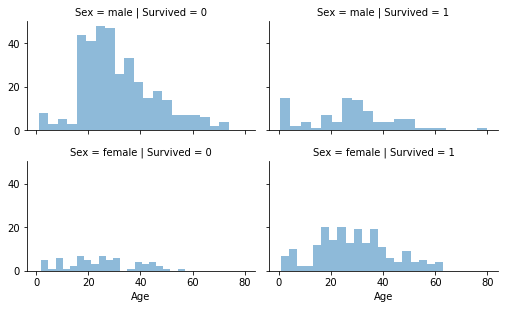

In [17]:
grid = sns.FacetGrid(train_df, col='Survived', row='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [18]:
#나이, p-class

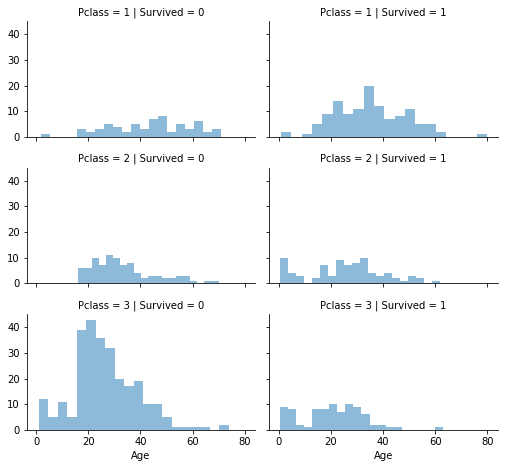

In [21]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [22]:
# pclass, age, sex ->생각보다 의미없어보임...

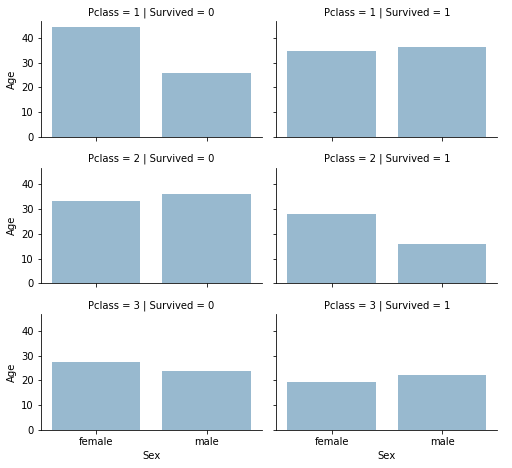

In [23]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Age', alpha=.5, ci=None)
grid.add_legend()

In [25]:
#자녀+부모 수 , 나이 , 생존률 

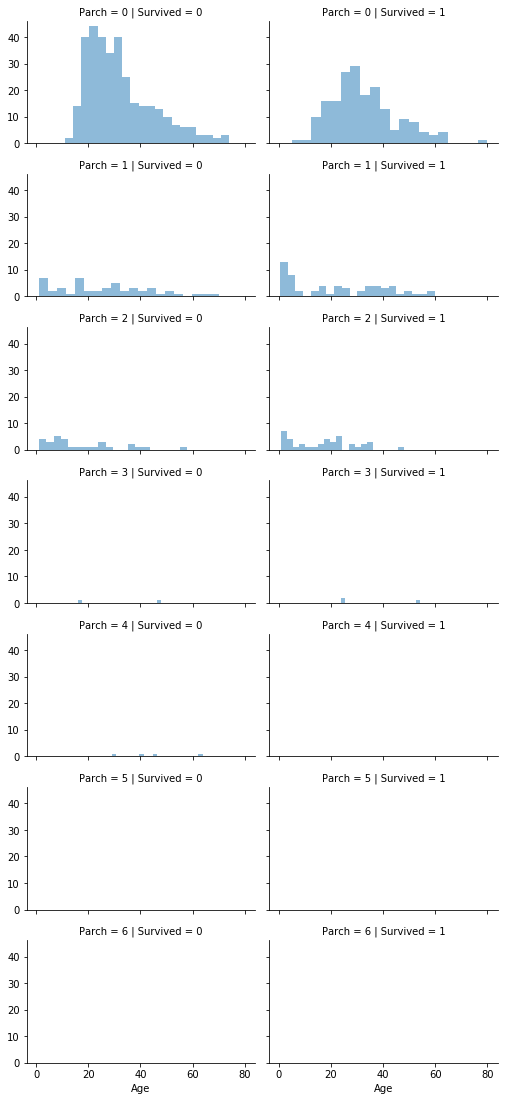

In [26]:
grid = sns.FacetGrid(train_df, col='Survived', row="Parch", size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

# 3. Feature Engineering

## 1) family_size 컬럼 추가

In [267]:
train_df['Family_size'] = train_df['SibSp']+train_df['Parch']

In [268]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [269]:
test_df['Family_size'] = test_df['SibSp']+test_df['Parch']

In [270]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


## 2) 성별 ->남자:0, 여자:1

In [271]:
train_df['Sex'] = train_df['Sex'].map({'female':1, 'male':0}).astype(int)

In [272]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0


In [273]:
test_df['Sex'] = test_df['Sex'].map({'female':1, 'male':0}).astype(int)

In [274]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,2


## 3) Age 결측값 채우기 & 연령대별로 범주화

In [275]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [276]:
for i in range(0, 2):
    for j in range(0, 3):
        guess_df = train_df[(train_df['Sex'] == i)&(train_df['Pclass'] == j+1)]['Age'].dropna()
        age_guess = guess_df.median()

        # Convert random age float to nearest .5 age
        guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
for i in range(0, 2):
    for j in range(0, 3):
        train_df.loc[ (train_df.Age.isnull()) & (train_df.Sex == i) & (train_df.Pclass == j+1),'Age'] = guess_ages[i,j]
train_df['Age'] = train_df['Age'].astype(int)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,S,0


In [277]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [278]:
for i in range(0, 2):
    for j in range(0, 3):
        guess_df = test_df[(train_df['Sex'] == i)&(test_df['Pclass'] == j+1)]['Age'].dropna()
        age_guess = guess_df.median()

        # Convert random age float to nearest .5 age
        guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
for i in range(0, 2):
    for j in range(0, 3):
        test_df.loc[ (test_df.Age.isnull()) & (test_df.Sex == i) & (test_df.Pclass == j+1),'Age'] = guess_ages[i,j]
test_df['Age'] = test_df['Age'].astype(int)

test_df.head()

C:\Users\82104\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
0,892,3,"Kelly, Mr. James",0,34,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",0,62,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",0,27,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22,1,1,3101298,12.2875,NaN,S,2


In [279]:
train_df.loc[train_df['Age']<=16, 'Age']=0
train_df.loc[(train_df['Age']>16)&(train_df['Age']<=30),'Age']=1
train_df.loc[(train_df['Age']>30)&(train_df['Age']<=40),'Age']=2
train_df.loc[(train_df['Age']>40)&(train_df['Age']<=50),'Age']=3
train_df.loc[(train_df['Age']>50)&(train_df['Age']<=60),'Age']=4
train_df.loc[train_df['Age']>60,'Age']=5
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,S,0


In [280]:
test_df.loc[test_df['Age']<=16, 'Age']=0
test_df.loc[(test_df['Age']>16)&(test_df['Age']<=30),'Age']=1
test_df.loc[(test_df['Age']>30)&(test_df['Age']<=40),'Age']=2
test_df.loc[(test_df['Age']>40)&(test_df['Age']<=50),'Age']=3
test_df.loc[(test_df['Age']>50)&(test_df['Age']<=60),'Age']=4
test_df.loc[test_df['Age']>60,'Age']=5
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
0,892,3,"Kelly, Mr. James",0,2,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,3,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",0,5,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",0,1,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,1,3101298,12.2875,NaN,S,2


## 4. embarked 결측값 채우기

In [281]:
freq = train_df.Embarked.dropna().mode()[0]
freq

'S'

In [282]:
train_df['Embarked'] = train_df['Embarked'].fillna(freq)

In [283]:
test_df['Embarked'] = test_df['Embarked'].fillna(freq)

In [284]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Family_size  891 non-null    int64  
dtypes: float64(1), int32(2), int64(6), object(4)
memory usage: 83.7+ KB


## 5. title 추가 후 name 삭제, passengerId 삭제

In [285]:
train_df['Title'] = train_df.Name.str.extract('([A-Za-z]+)\.', expand = False)

In [286]:
train_df.groupby(by=['Title'], as_index=False)['Title','Survived'].mean()

C:\Users\82104\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Countess,1.000000
3,Don,0.000000
4,Dr,0.428571
5,Jonkheer,0.000000
6,Lady,1.000000
7,Major,0.500000
8,Master,0.575000
9,Miss,0.697802


In [287]:
pd.crosstab(train_df['Title'], train_df['Survived'])

Survived,0,1
Title,,
Capt,1,0
Col,1,1
Countess,0,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23


In [288]:
train_df['Title'] = train_df['Title'].replace('Mlle','Miss')
train_df['Title'] = train_df['Title'].replace('Ms', 'Miss')
train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs')
train_df['Title'] = train_df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona','Major'], 'Rare')

In [289]:
title_num = {'Mr':1, "Miss":2, "Mrs":3, "Master": 4, "Rare": 5}
train_df['Title'] = train_df['Title'].map(title_num)
train_df['Title'] = train_df['Title'].fillna(0)   #결측값은 0으로 채우기
    
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,C,1,3
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,S,1,3
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,S,0,1


In [290]:
test_df['Title'] = test_df.Name.str.extract('([A-Za-z]+)\.', expand = False)

In [291]:
test_df['Title'] = test_df['Title'].replace('Mlle','Miss')
test_df['Title'] = test_df['Title'].replace('Ms', 'Miss')
test_df['Title'] = test_df['Title'].replace('Mme', 'Mrs')
test_df['Title'] = test_df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona','Major'], 'Rare')

In [292]:
title_num = {'Mr':1, "Miss":2, "Mrs":3, "Master": 4, "Rare": 5}
test_df['Title'] = test_df['Title'].map(title_num)
test_df['Title'] = test_df['Title'].fillna(0)   #결측값은 0으로 채우기
    
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Title
0,892,3,"Kelly, Mr. James",0,2,0,0,330911,7.8292,NaN,Q,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,3,1,0,363272,7.0000,NaN,S,1,3
2,894,2,"Myles, Mr. Thomas Francis",0,5,0,0,240276,9.6875,NaN,Q,0,1
3,895,3,"Wirz, Mr. Albert",0,1,0,0,315154,8.6625,NaN,S,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,1,3101298,12.2875,NaN,S,2,3


In [293]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)

In [294]:
test_df = test_df.drop(['Name'], axis=1)

In [295]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Title
0,0,3,0,1,1,0,A/5 21171,7.2500,NaN,S,1,1
1,1,1,1,2,1,0,PC 17599,71.2833,C85,C,1,3
2,1,3,1,1,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2
3,1,1,1,2,1,0,113803,53.1000,C123,S,1,3
4,0,3,0,2,0,0,373450,8.0500,NaN,S,0,1


In [296]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Title
0,892,3,0,2,0,0,330911,7.8292,NaN,Q,0,1
1,893,3,1,3,1,0,363272,7.0000,NaN,S,1,3
2,894,2,0,5,0,0,240276,9.6875,NaN,Q,0,1
3,895,3,0,1,0,0,315154,8.6625,NaN,S,0,1
4,896,3,1,1,1,1,3101298,12.2875,NaN,S,2,3


## 6. Ticket, Cabin 삭제

In [297]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)


In [298]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size,Title
0,0,3,0,1,1,0,7.2500,S,1,1
1,1,1,1,2,1,0,71.2833,C,1,3
2,1,3,1,1,0,0,7.9250,S,0,2
3,1,1,1,2,1,0,53.1000,S,1,3
4,0,3,0,2,0,0,8.0500,S,0,1


## 7. SibSp,Parch 삭제

In [299]:
train_df = train_df.drop(['SibSp', 'Parch'], axis=1)
test_df = test_df.drop(['SibSp', 'Parch'], axis=1)

In [300]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_size,Title
0,0,3,0,1,7.2500,S,1,1
1,1,1,1,2,71.2833,C,1,3
2,1,3,1,1,7.9250,S,0,2
3,1,1,1,2,53.1000,S,1,3
4,0,3,0,2,8.0500,S,0,1


In [301]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Family_size,Title
0,892,3,0,2,7.8292,Q,0,1
1,893,3,1,3,7.0000,S,1,3
2,894,2,0,5,9.6875,Q,0,1
3,895,3,0,1,8.6625,S,0,1
4,896,3,1,1,12.2875,S,2,3


## 8. Fare 범주화

In [302]:
train_df.loc[train_df['Fare']<=50, 'Fare']=0
train_df.loc[(train_df['Fare']>50)&(train_df['Fare']<=100),'Fare']=1
train_df.loc[(train_df['Fare']>100)&(train_df['Fare']<=150), 'Fare']=2
train_df.loc[(train_df['Fare']>150)&(train_df['Fare']<=200), 'Fare']=3
train_df.loc[train_df['Fare']>200, 'Fare']=4
train_df['Fare']=train_df['Fare'].astype(int)

In [303]:
# test_df 결측값 먼저 채우기

In [304]:
fare_median = test_df.Fare.dropna().median()
fare_median

14.4542

In [305]:
test_df['Fare'] = test_df['Fare'].fillna(fare_median)

In [306]:
test_df.loc[test_df['Fare']<=50, 'Fare']=0
test_df.loc[(test_df['Fare']>50)&(test_df['Fare']<=100),'Fare']=1
test_df.loc[(test_df['Fare']>100)&(test_df['Fare']<=150), 'Fare']=2
test_df.loc[(test_df['Fare']>150)&(test_df['Fare']<=200), 'Fare']=3
test_df.loc[test_df['Fare']>200, 'Fare']=4
test_df['Fare']=test_df['Fare'].astype(int)

## 9. embarked 숫자 범주로 바꾸기

In [307]:
train_df['Embarked'] = train_df['Embarked'].map({'S':0, 'Q':1, 'C':2}).astype(int)
test_df['Embarked'] = test_df['Embarked'].map({'S':0, 'Q':1, 'C':2}).astype(int)

In [308]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_size,Title
0,0,3,0,1,0,0,1,1
1,1,1,1,2,1,2,1,3
2,1,3,1,1,0,0,0,2
3,1,1,1,2,1,0,1,3
4,0,3,0,2,0,0,0,1


In [309]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Family_size,Title
0,892,3,0,2,0,1,0,1
1,893,3,1,3,0,0,1,3
2,894,2,0,5,0,1,0,1
3,895,3,0,1,0,0,0,1
4,896,3,1,1,0,0,2,3


In [310]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df['Correlation']=pd.Series(logreg.coef_[0])


coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.207590
6,Title,0.528899
4,Embarked,0.202509
3,Fare,0.154286
5,Family_size,-0.278672
2,Age,-0.418819
0,Pclass,-1.016987


# 4. Modeling

In [313]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

### 1. Logistic Regression

In [314]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train)*100, 2)
acc_log

81.71

### 2. K-NN

In [315]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train)*100,2)
acc_knn

84.96

### 3. Decision Tree

In [316]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train)*100,2)
acc_decision_tree

87.88

### 4. Random Forest

In [317]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

87.88

### 5. Xgboost

In [318]:
import xgboost
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn import model_selection


In [319]:
xg_boost = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.65, gamma=2, learning_rate=0.3, max_delta_step=1,
       max_depth=4, min_child_weight=2, missing=None, n_estimators=280,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [320]:
xg_boost.fit(X_train, Y_train)
Y_pred = xg_boost.predict(X_test)
acc_xg_boost = round(xg_boost.score(X_train, Y_train)*100,2)
acc_xg_boost

[09:42:51] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




84.29

## 6. Lgbm

In [321]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(learning_rate=0.01, n_estimators=1000)

In [322]:
lgbm.fit(X_train, Y_train)
Y_pred = lgbm.predict(X_test)
acc_lgbm = round(lgbm.score(X_train, Y_train)*100,2)
acc_lgbm

86.08

# summary

In [323]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN','Random Forest', 'Decision Tree', 'Xgboost', 'Lightgbm'],
    'Score': [acc_log, acc_knn,acc_random_forest, acc_decision_tree,acc_xg_boost, acc_lgbm]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,87.88
3,Decision Tree,87.88
5,Lightgbm,86.08
1,KNN,84.96
4,Xgboost,84.29
0,Logistic Regression,81.71


# Submission

In [324]:
Y_pred = random_forest.predict(X_test)

In [325]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('submission.csv', index=False)